11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
235/235 [==============================] - 9s 31ms/step - loss: 0.0586 - val_loss: 0.0542
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0534 - val_loss: 0.0522
Epoch 3/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0515 - val_loss: 0.0506
Epoch 4/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0498 - val_loss: 0.0489
Epoch 5/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0484 - val_loss: 0.0478
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0475 - val_loss: 0.0473
Epoch 7/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0468 - val_loss: 0.0466
Epoch 8/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0463 - val_loss: 0.0462
Epoch 9/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0458 - val_loss: 0.0457
Epoch 10/20
235/235 [=====

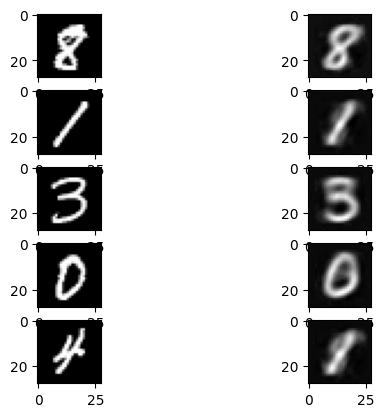

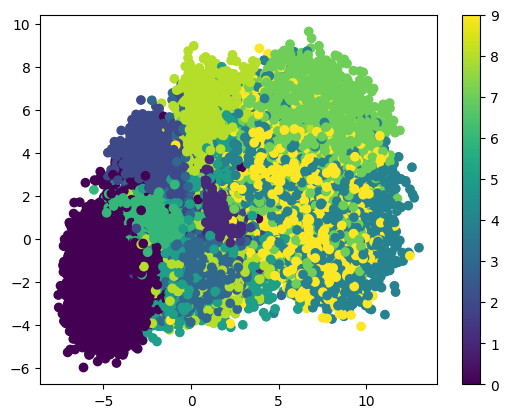

In [6]:
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot

# Encoder
x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

# Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")

# Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")

# RMSE
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict))

# AE Compilation
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

# Training AE
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
matplotlib.pyplot.colorbar()


In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

# Step 1: Import the required libraries

# Step 2: Download historical stock data
start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2023,4,1)
data = yf.download("GOOGL", start_date, end_date)
print(data)

# Step 3: Split the dataset into training and testing
training_data_len = math.ceil(len(data) * .8)
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]

# Step 4: Select "Open" price values and reshape
dataset_train = train_data.Open.values
dataset_train = np.reshape(dataset_train, (-1,1))

# Step 5: Normalize the training dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(dataset_train)

# Step 6: Normalize the testing dataset
dataset_test = test_data.Open.values
dataset_test = np.reshape(dataset_test, (-1,1))
scaled_test = scaler.fit_transform(dataset_test)

# Step 7: Divide data into input/output sequences for training
X_train, y_train = [], []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

# Step 8: Reshape data for RNN input
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

# Step 9: Create RNN models (SimpleRNN, LSTM, GRU)

# Step 10: Train the models

# Step 11: Make predictions

# Step 12: Visualize the predicted prices


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-04-01   56.200001   56.471001   54.674500   55.105000   55.105000   
2020-04-02   55.000000   56.138500   54.656502   55.851501   55.851501   
2020-04-03   55.735500   55.939499   53.754002   54.634998   54.634998   
2020-04-06   56.650002   59.537498   56.250000   59.159500   59.159500   
2020-04-07   60.850498   61.039001   58.862499   59.127998   59.127998   
...                ...         ...         ...         ...         ...   
2023-03-27  104.620003  104.760002  101.930000  102.459999  102.459999   
2023-03-28  102.440002  102.449997   99.739998  101.029999  101.029999   
2023-03-29  102.279999  102.489998  100.650002  101.389999  101.389999   
2023-03-30  100.910004  101.160004   99.779999  100.889999  100.889999   
2023-03-31  101.300003  103.889999  101.040001  103.730003  103.730003   

              Volume  
Date          